# Identificar los factores que determinan el éxito de un videojuego


Trabajamos para la tienda online Ice, que vende videojuegos en todo el mundo. Tenemos acceso a reseñas de usuarios y expertos, géneros, plataformas (por ejemplo, Xbox o PlayStation) y datos históricos sobre las ventas de juegos. Necesitamos identificar patrones que determinen si un juego tiene éxito o no. Esto nos permitirá detectar posibles grandes ganadores y planificar campañas publicitarias

# Paso 1. Información general

Importaremos las librerías necesarias para nuestro proyecto

In [5]:
from scipy import stats as st #for probability and statistics calculations
import pandas as pd #for dataframe manipulation
import matplotlib.pyplot as plt #for graph plotting and display
import numpy as np #for advanced mathematical operations

In [6]:
success_games = pd.read_csv('C:/Users/USER/Documents/proyectos/proyecto 5 (integrado 1 terminado)/games.csv')

In [7]:
success_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
success_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
success_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Tenemos que uniformizar los nombres de las columnas convirtiéndolos todos a minúsculas y, a continuación, hacer algo con los valores que faltan en "Name", "Year_of_Release", "Genre", "Critic_Score", "User_Score" y "Rating".

Conclusión
Hemos abierto el archivo y examinado su información general. Hemos detectado problemas que deben solucionarse

## Paso 2. Procesamiento de datos

*Nombres de columnas en minúsculas
Utilizaremos el método 'str.lower()

In [10]:
#esto cambia los nombres de las columnas a minúsculas y guarda los cambios
success_games.columns = success_games.columns.str.lower()

#mostraremos de nuevo la info para ver los cambios efectuados
success_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Todos los nombres de columna están ahora en minúsculas

---

### La columna "name"
Sólo le faltan dos valores ausentes (que no se pusieron o se perdieron en el proceso de copia) y no hay forma de rellenar el nombre real del juego. Así que los dejaremos en blanco. Sin embargo, podemos convertir los valores a minúsculas

In [11]:
success_games['name'] = success_games['name'].str.lower()
success_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


---

### La columna "platform"
Sólo tenemos que poner los valores en minúsculas

In [12]:
success_games['platform'] = success_games['platform'].str.lower()
success_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Veamos los distintos valores únicos de la columna "name"

In [13]:
success_games['name'].unique()

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

- Podemos fijarnos en la entrada: 'mario kart wii'. El nombre contiene la plataforma. Debemos partir de la base de que hay otras entradas que también contienen sus plataformas en sus nombres. Más adelante, analizaremos cómo se comportan los juegos en las distintas plataformas, por lo que necesitamos que un juego tenga el mismo nombre en todas ellas. 
- También ayuda saber que Mario Kart existe en otras plataformas. Escribiremos una función que compruebe si el nombre del juego contiene la plataforma y, en caso afirmativo, la elimine del nombre. Como nos faltan valores, utilizaremos bloques try-except. En el bloque try almacenaremos el código que intentará ejecutarse si todo va bien. Si no se puede ejecutar (como en el caso de que falte un valor), se ejecutará el código que almacenaremos en el bloque except

In [14]:
def no_p_name(row): #crea una función llamada no_p_name que toma una fila como argumento
    try: 
        name=row['name'] 
        if row['platform'] in row['name']:
            name = row['name'].strip(row['platform'])
            return name
        return name
    #si el código del bloque try no puede ejecutarse
    except: 
        name=row['name']
        return name

In [15]:
#aplica la función no_p_name al dataframe de los juegos y guarda los resultados en nuestra columna "name"
success_games['name'] = success_games.apply(no_p_name, axis=1)
success_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,sports,wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart,wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,sports resort,wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


---

### La columna "year_of_release
- intentaremos sustituir los valores ausentes que faltan por la mediana. para ello no utilizaremos la mediana global.
- Por ello,agruparemos nuestros datos por la columna **"platform"** y calcular la mediana del **"year_of_release"** en cada plataforma. 
- crearemos una función que compruebe si faltan valores de **"year_of_release"** en las filas de nuestros datos. Cuando encuentre uno, comprobará su plataforma(**"platform"**) y devolverá el valor medio del año de lanzamiento para la plataforma a partir de nuestros datos agrupados.

In [16]:
#haremos una agrupacion de la columna "platform" y "year_of_release" el año medio de lanzamiento de los juegos y lo conviertiremos en un diccionario llamado year_groupby
year_groupby = success_games.groupby('platform')['year_of_release'].median().to_dict()

def year_fill(row):
    if np.isnan(row['year_of_release']):
        return year_groupby.get(row['platform'])
    return row['year_of_release']

In [17]:
#aplica la función year_fill a la tabla games y guarda los resultados en la columna year_of_release
success_games['year_of_release'] = success_games.apply(year_fill, axis=1)
success_games.info()#general info about games dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Cambiar el tipo de datos a entero

In [18]:
#convierte los valores de la columna 'year_of_release' a tipo "int"
success_games['year_of_release'] = success_games['year_of_release'].astype('int')
success_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,sports,wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart,wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,sports resort,wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


---

### La columna "genre"
Sólo le faltan dos valores que no se pusieron o se perdieron en el proceso de recoleccion de datos y no hay forma de rellenar el género real del juego. Sin embargo, los rellenaremos con la palabra **"undefined"** ya que no podemos saber a ciencia cierta su procedencia tambien podemos cambiar los valores a minúsculas y normalizar los valores.

In [19]:
#mostraremos los valores unicos para observar si necesitamos una correcion de datos
success_games["genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

al parecer necesitamos normalizar los datos en minusculas

In [20]:
success_games['genre'] = success_games['genre'].str.lower()
success_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [21]:
#mostraremos los valores unicos para observar si necesitamos una correcion de datos
success_games["genre"].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

ya todo quedo solucionado y corregimos el error

ahora trataremmos los valores ausentes de dicha columna para un mejor analísis

In [22]:
success_games['genre'] = success_games['genre'].fillna('undefined')
#fills missing values in the genre column with 'undefined'
success_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [23]:
success_games["genre"].value_counts()

action          3369
sports          2348
misc            1750
role-playing    1498
shooter         1323
adventure       1303
racing          1249
platform         888
simulation       873
fighting         849
strategy         683
puzzle           580
undefined          2
Name: genre, dtype: int64

---

### La columna "critic_score"
- Al igual que con la columna **"year_of_release"** trataremos los valores ausentes de la misma manera con esta columna que es **"critic_score"**
- Cada valor de critic_score que falte se rellenará con el valor de critic_score mediano de su género. 
- Para ello, podemos agrupar nuestros datos por "género" y calcular la puntuación_crítica media de cada género. 
- Crearemos una función que compruebe si faltan valores de critic_score en las filas de nuestros datos. Cuando encuentre uno, comprobará su género y devolverá el valor medio de la puntuación de crítico para el género de nuestros datos agrupados.

In [24]:
#haremos una agrupacion los juegos por la columna "genre" y la columna "critic_score" media y lo conviertiremos en un diccionario llamado c_score_groupby
c_score_mapper = success_games.groupby('genre')['critic_score'].median().to_dict()

def c_score_fill(row):
    if np.isnan(row['critic_score']):
        return c_score_mapper.get(row['genre'])
    return row['critic_score']

In [25]:
#aplicaremos la funcion a la columna "critic_score" y ver efectuados los cambios
success_games['critic_score'] = success_games.apply(c_score_fill, axis=1)
success_games.info() #general info about our games dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


---

### La columna "user_score"
Para empezar, esta columna es de tipo objeto aunque veamos números en ella. Esto significa que también puede tomar valores de cadena de texto. Por lo tanto, antes de convertir, vamos a comprobar sus valores en primer lugar. Apliquemos el método 'value_counts()' a la columna

In [26]:
success_games["user_score"].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [27]:
success_games["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [28]:
success_games["user_score"].isna().sum()

6701

In [29]:
filtered = success_games.query('user_score == "tbd"')
filtered

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010,sports,3.45,2.59,0.0,0.66,75.0,tbd,E
301,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,zumba fitness 2,wii,2011,sports,1.51,1.03,0.0,0.27,75.0,tbd,T
645,udraw studio,wii,2010,misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,frogger's adventures: temple of the frog,gba,2003,adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001,action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,bust-a-move 3000,gc,2003,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,mega brain boost,ds,2008,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,plushees,ds,2008,simulation,0.01,0.00,0.0,0.00,70.0,tbd,E


- EL problema está al principio de la lista: "tbd" (to be determined = por determinar). Se utiliza para videojuegos que aún no tienen una puntuación de usuario y aparece 2424 veces, así que tenemos que averiguar qué hacer con él antes de convertir toda la columna a tipo flotante. 
- Más adelante, tendremos que estudiar el efecto que tienen las reseñas y las ventas. "tbd" no es una reseña; sólo significa que el juego aún no ha sido reseñado. 
- Así que trataremos estos juegos como si no tuvieran reseña, por lo que en realidad sustituiremos "tbd" por un valor NaN(not at number)

In [30]:
#reemplaza cada valor 'tbd' de la columna user_score por NaN, es decir, un valor perdido
success_games['user_score'] = success_games['user_score'].replace({'tbd' : np.nan})
#convierte los datos de la columna user_score a tipo float
success_games['user_score'] = success_games['user_score'].astype('float')
success_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


Ahora sustituiremos todos los valores NaN(valores ausentes) por la media. Podemos hacerlo con la media porque tenemos valores flotantes dentro de un rango definido.

In [31]:
success_games['user_score'] = success_games['user_score'].fillna(success_games['user_score'].mean())
success_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


---

### La columna "rating"

Veamos los valores de la columna "rating

In [32]:
success_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

- Al tratarse de una columna categórica, utilizaremos la moda. Así que agruparemos el dataframe de juegos por género(**"genre"**) y, para cada género, obtendremos la valoración(**"rating"**) más popular y convertiremos el dataframe resultante en un diccionario. 
- Crearemos una función que busque filas con valores perdidos en la columna de clasificación, compruebe su género y devuelva la clasificación más popular para ese género. 
- ya solo nos queda aplicar la función al dataframe guardar los resultados en la columna de valoración(**"rating"**) y ver los resultados

In [33]:
#haremos una agrupacion los juegos por la columna "genre" y la columna "rating" para sacar la moda y asi obtener la clasificación mas popular para cada genero lo conviertiremos en un diccionario llamado "rating_groupby"
rating_groupby = success_games.groupby('genre')['rating'].agg(pd.Series.mode).to_dict()

def rating_fill(row):
    if pd.isna(row['rating']):
        return rating_groupby.get(row['genre'])
    return row['rating']

In [34]:
success_games['rating'] = success_games.apply(rating_fill, axis=1)
success_games.info()#general info about the games table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


---

### Cálculo de las ventas totales
Sumaremos las columnas **"na_sales"**, **"eu_sales"**, **"jp_sales"** y **"other_sales"** guardaremos los resultados en una nueva columna llamada "total_sales".

In [35]:
success_games['total_sales'] = success_games['na_sales'] + success_games['eu_sales'] + success_games['jp_sales'] + success_games['other_sales']
success_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.5+ MB


In [36]:
success_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.000000,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,69.0,7.125046,E,40.24
2,mario kart,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.300000,E,35.52
3,sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.000000,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,74.0,7.125046,T,31.38


- Conclusión general (Intermedia)
  -
Hemos hecho los cambios pertinentes los nombres de las columnas las normalizamos (minúsculas), tambien tratamos los valores ausentes en las columnas del dataframe, **"year_of_release"**, **"genre"**, **"critic_score"**, **"user_score"** y **"rating"**. Creamos una nueva que suma las ventas totales columna "total_sales" que suma los valores de las columnas **"na_sales"**, **"eu_sales"**, **"jp_sales"** y **"other_sales"**.

---

## Paso 3. Analisis de los datos

Los juegos a lo largo de los años el lanzamiento
Podemos obtener esta información agrupando la columna **"year_of_release"** y **"name"** contando el número de nombres de juegos de cada año.

In [37]:
year_count = success_games.groupby('year_of_release')['name'].count()
#creates a table called year count which groups the games table by year_of_release and gets a count of the
#game names for each year
year_count

year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     290
1998     386
1999     341
2000     350
2001     482
2002     829
2003     800
2004     783
2005     973
2006    1006
2007    1197
2008    1457
2009    1476
2010    1302
2011    1161
2012     653
2013     552
2014     582
2015     606
2016     502
Name: name, dtype: int64

Podemos visualizarlo mejor en un gráfico de barras

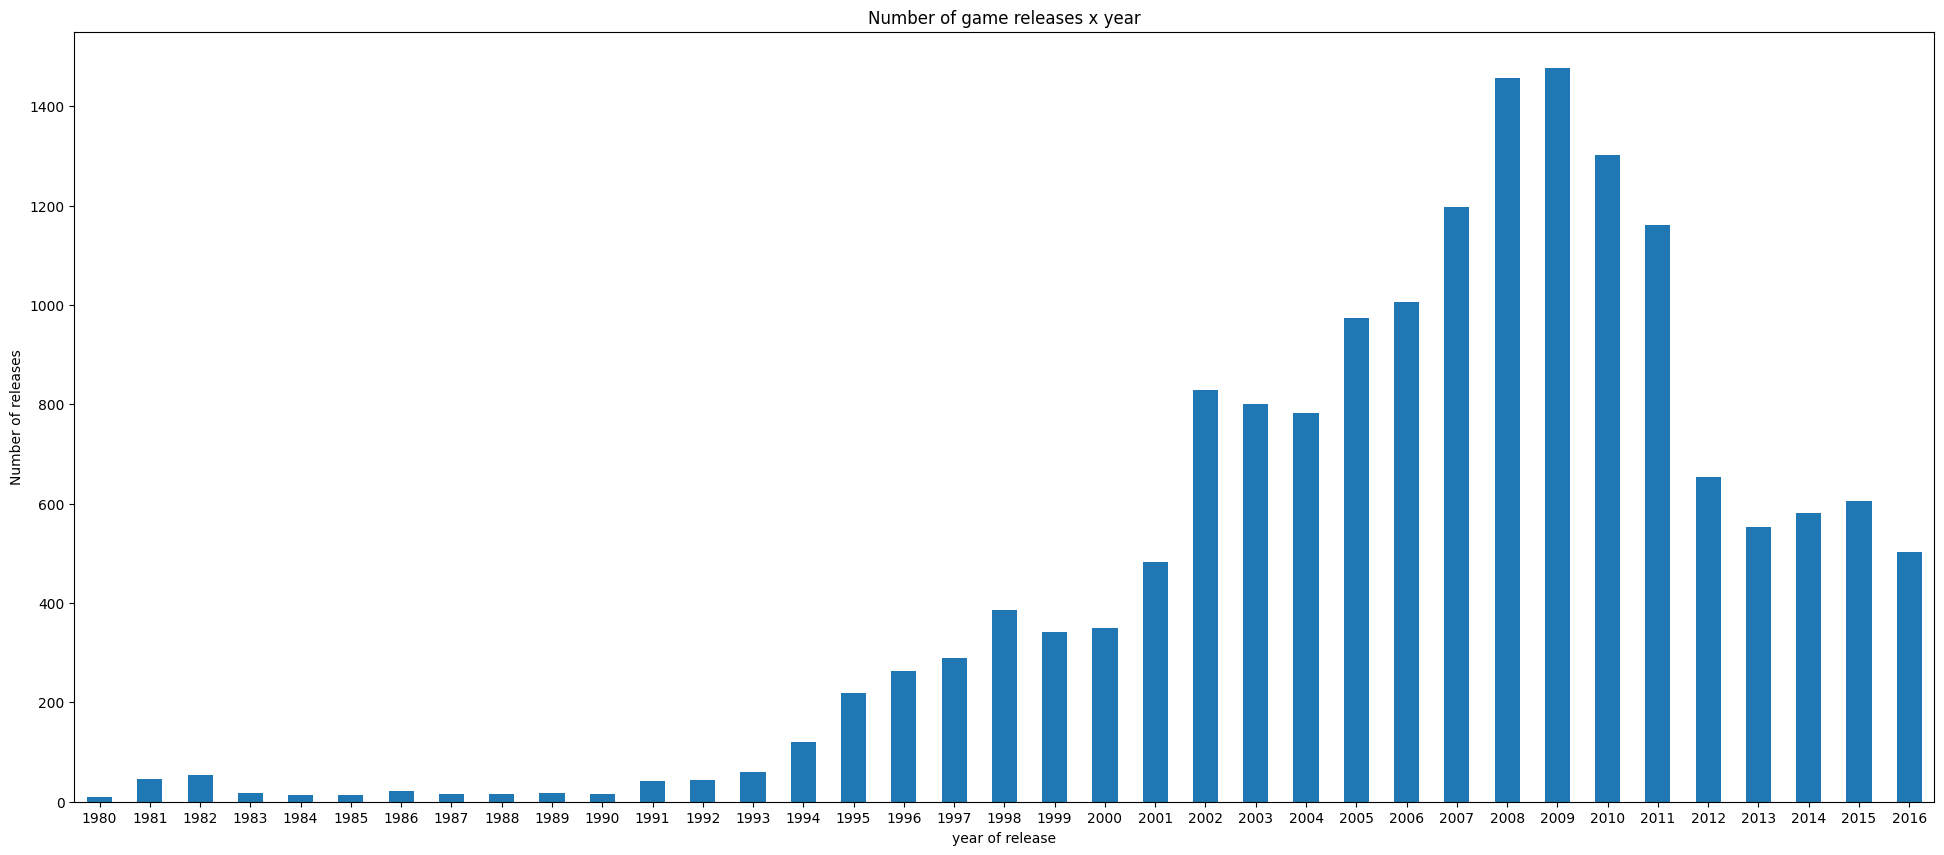

In [38]:
#traza un gráfico de barras para nuestra tabla year_count que muestra los años y cuántos juegos tuvo cada año
year_count.plot.bar(rot=0, figsize=(24, 10))
plt.title('Number of game releases x year')
plt.xlabel('year of release')
plt.ylabel('Number of releases')
plt.show()

haciendo una analisis 1980 y 1994 se lanzaron menos de 200 videojuegos al año. Los videojuegos empezaron a popularizarse a partir de 1995, y en 2001 se lanzaron cerca de unos 500 títulos. En 2002 se produjo un fuerte aumento: ese año se lanzaron más de 800 juegos. De 2007 a 2011 son los mejores años en cuanto a lanzamientos, con 2009 se lanzaron cerca de 1500 lanzamientos (el pico maximo). No todos los periodos son significativos.

### Vida útil de una plataforma

En primer lugar, busquemos las ventas totales de cada plataforma en todos los tiempos y clasifiquémoslas

In [39]:
#agruparemos el dataframe de "success_games" por plataforma y hallaremos la suma de las ventas totales de cada plataforma en orden descendente
platform_ranking = success_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms=platform_ranking.head()
#takes the first 5 rows of the platform ranking table
top_platforms

platform
ps2     1255.77
x360     971.42
ps3      939.65
wii      907.51
ds       806.12
Name: total_sales, dtype: float64

PS2 va como lider en cabeza en ventas, seguida de X-box 360, PS3, Wii y Nintendo DS. Ahora vamos a trazar, para cada una de estas plataformas, gráficos de barras que muestren las ventas totales en cada año.

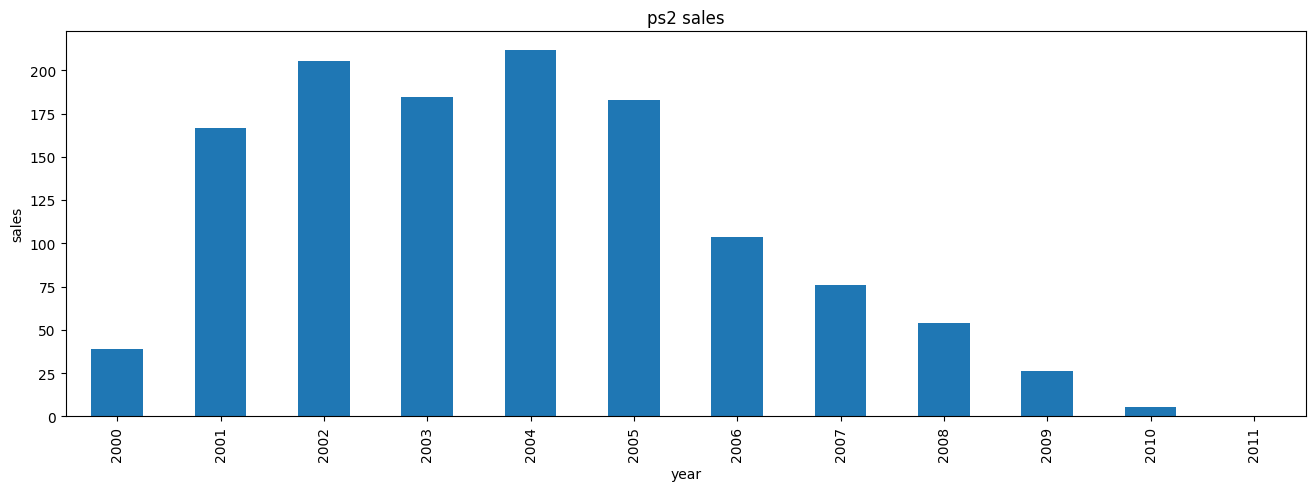

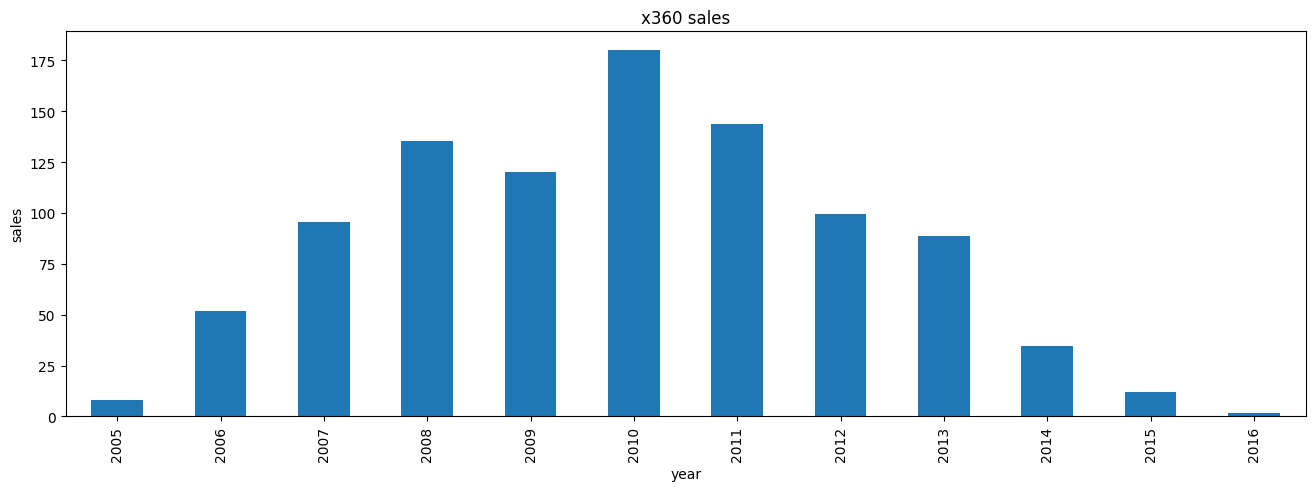

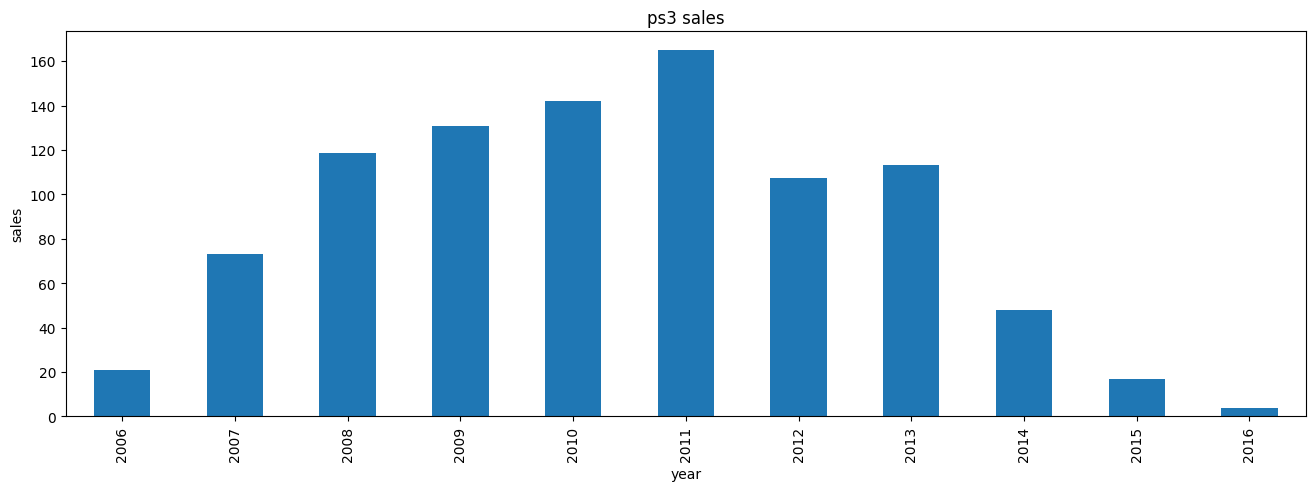

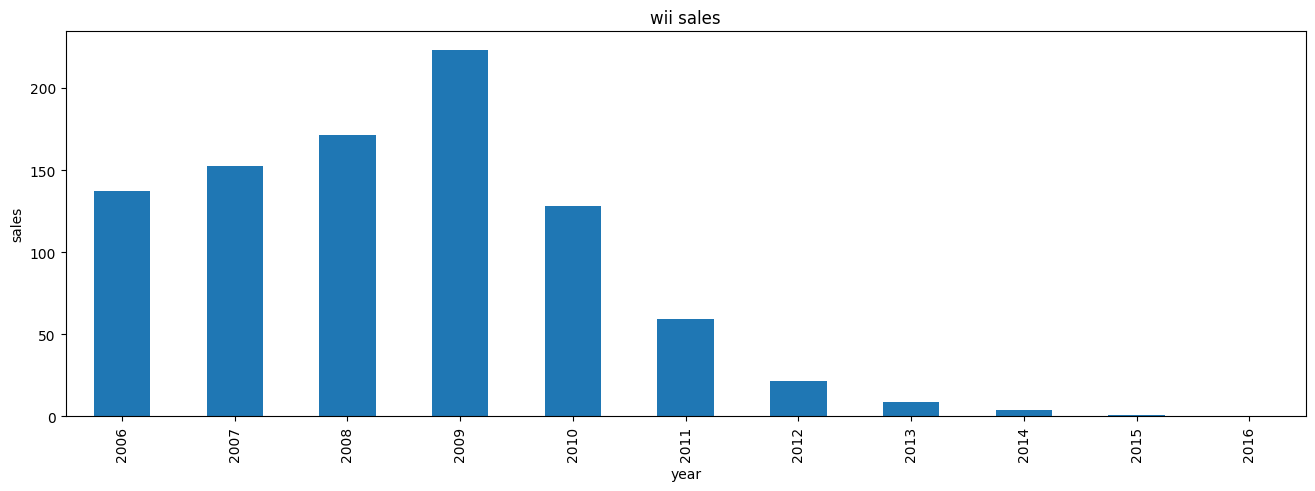

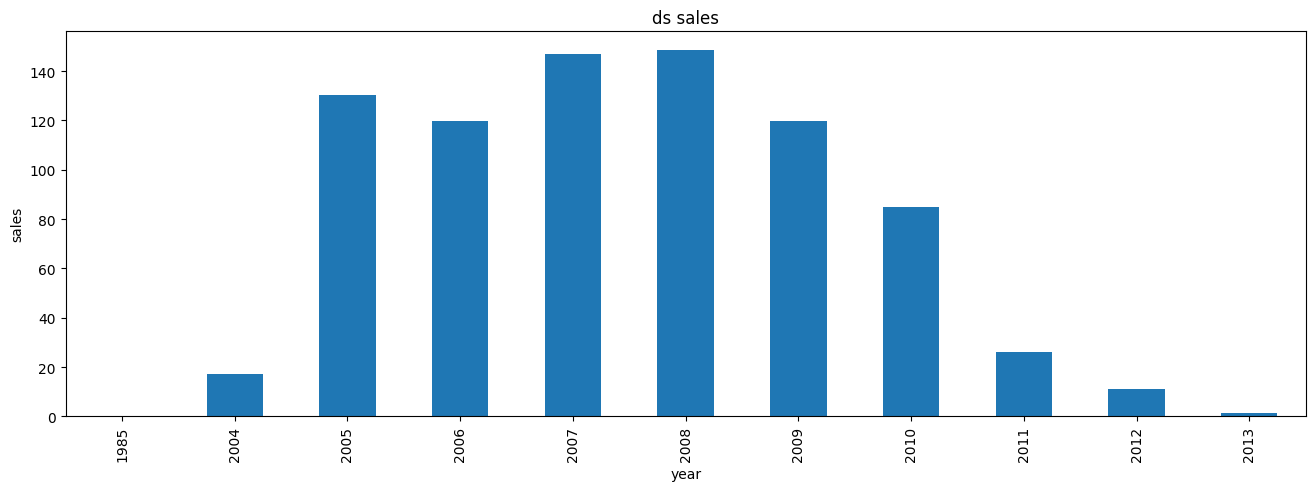

In [40]:
for platform in top_platforms.index:
    p_slice=success_games.query('platform == @platform')
    #agruparemos por año de lanzamiento y obtienemos la suma de las ventas totales de cada año y trazaremos un gráfico de barras de cada plataforma para un mejor analisis
    p_slice.groupby('year_of_release')['total_sales'].sum().plot.bar(figsize=(16, 5))
    plt.title('{} sales'.format(platform))
    plt.xlabel('year')
    plt.ylabel('sales')
    plt.show()
    print('')

- En el caso de la PS2, comenzó en el año 2000 y experimentó un aumento de las ventas y se hizo enormemente popular en 2004, tras lo cual podemos observar un descenso de las ventas y cero ventas después de 2010.
- La xbox360, comenzo en el año 2005 y su pico maximo en ventas fue en el 2010, tras tener un descenso significativo en el 2016 casi a cer. 
- Su sucesora, la PS3, apareció en 2006 y experimento un aumento de las ventas en el año durante el declive de ventas. 
- La Wii apareció en 2006, alcanzó su punto maximo en 2009, tras lo cual decayó y registró en ventas después de 2015.
- La DS apareció en 2004, se hizo enormemente popular en 2007 y 2008, tras lo cual decayó y registró cero ventas después de 2013. Así pues, las nuevas consolas tardan entre 6 y 7 años en aparecer y entre 9 y 10 años en desaparecer por completo del mercado. 
- Los datos pertinentes comenzarán a partir del año 2007 para que podamos tener una línea temporal similar a la vida útil de una plataforma.

### Ventas de videojuegos desde el año 2007 en adelante

In [41]:
significant_data = success_games.query('year_of_release >= 2007')
significant_platform_ranking = significant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
significant_platform_ranking

platform
ps3     918.69
x360    911.55
wii     770.36
ds      538.88
ps4     314.14
3ds     259.00
psp     187.83
pc      164.33
ps2     162.38
xone    159.32
wiiu     82.19
psv      54.07
gba       3.40
xb        0.73
gc        0.27
dc        0.06
Name: total_sales, dtype: float64

En este caso la PS3 es la que tiene más ventas totales desde 2007, seguida de x360, wii, ds, ps4 para complementar el top 5. 
para un mejor analisis de como se comportamiento en el mercado trazaremos graficos de barras para cada plataforma.

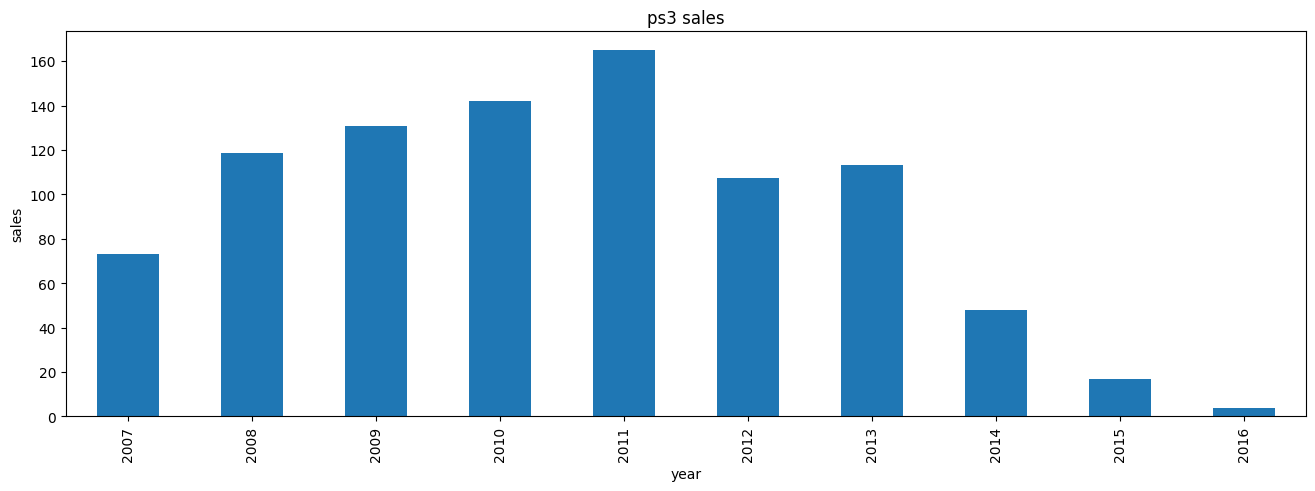

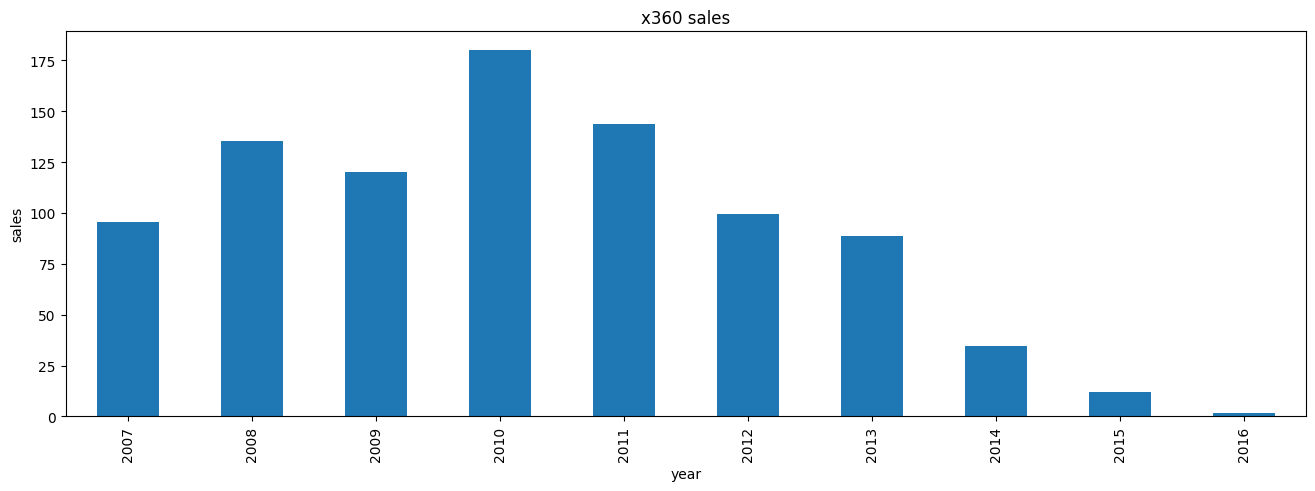

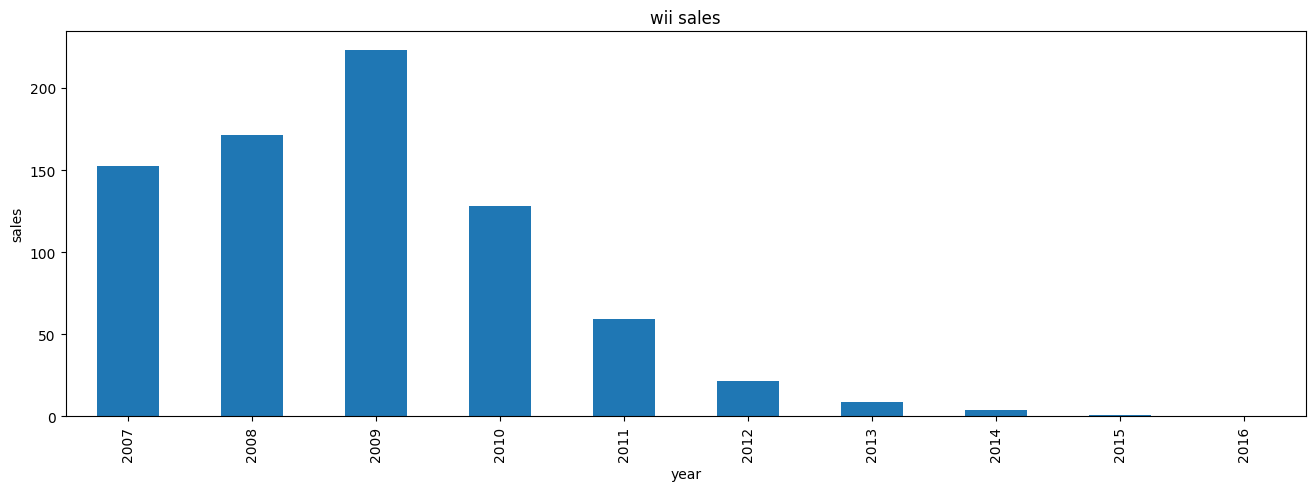

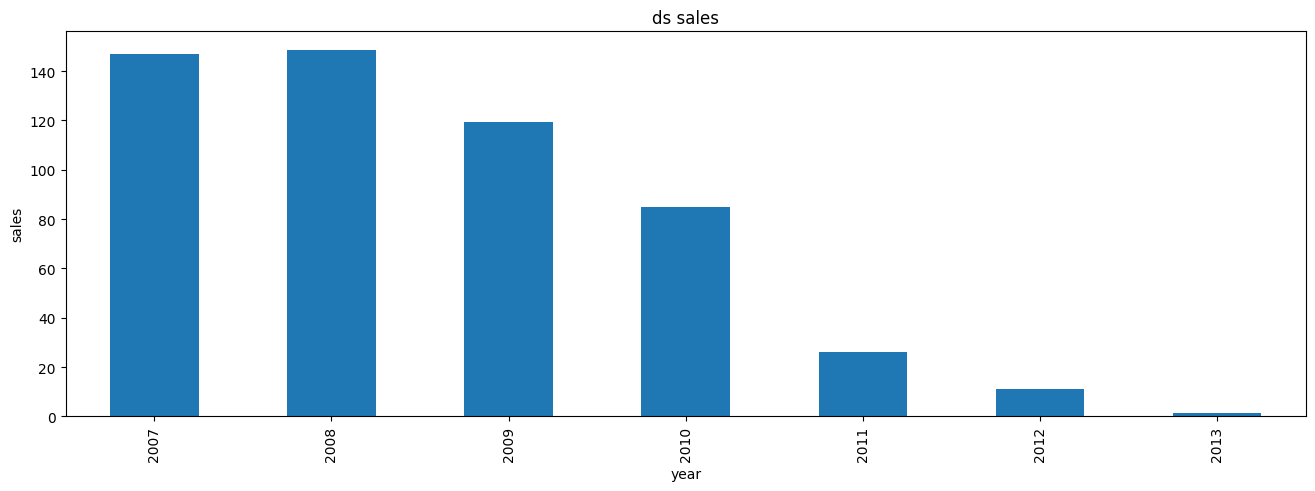

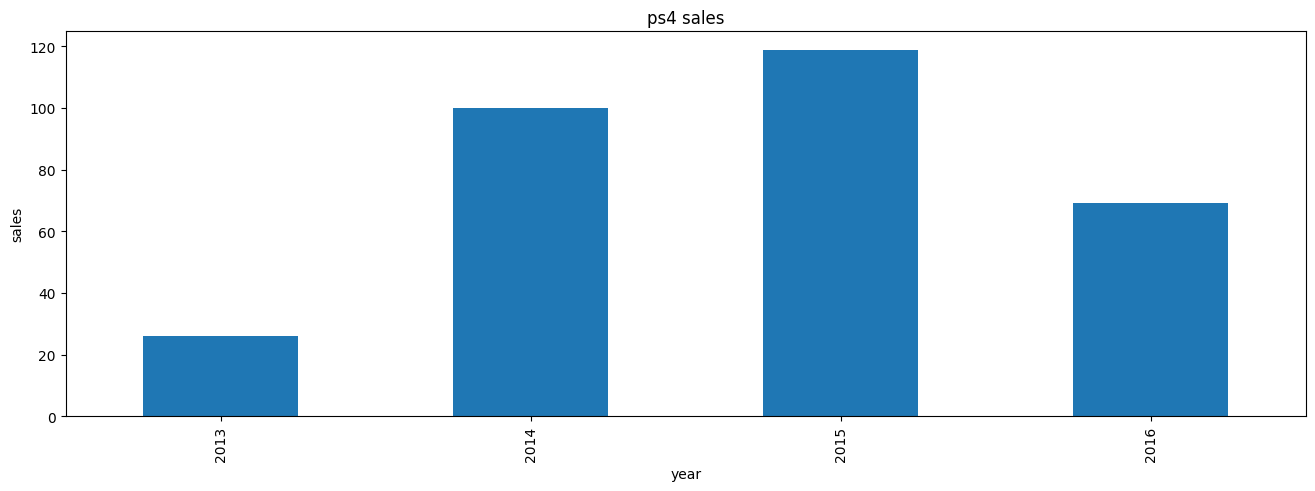

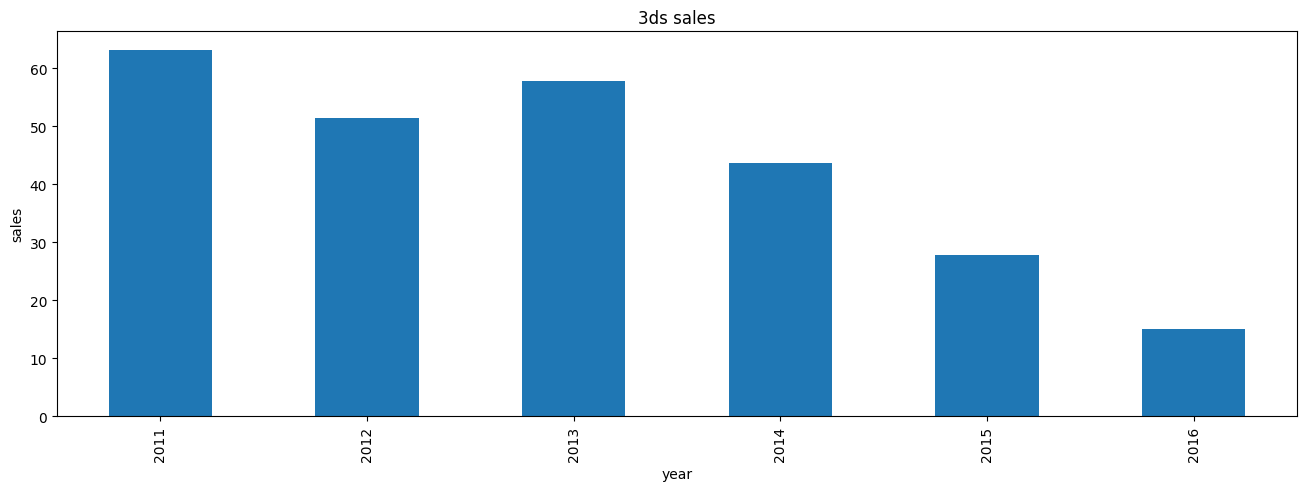

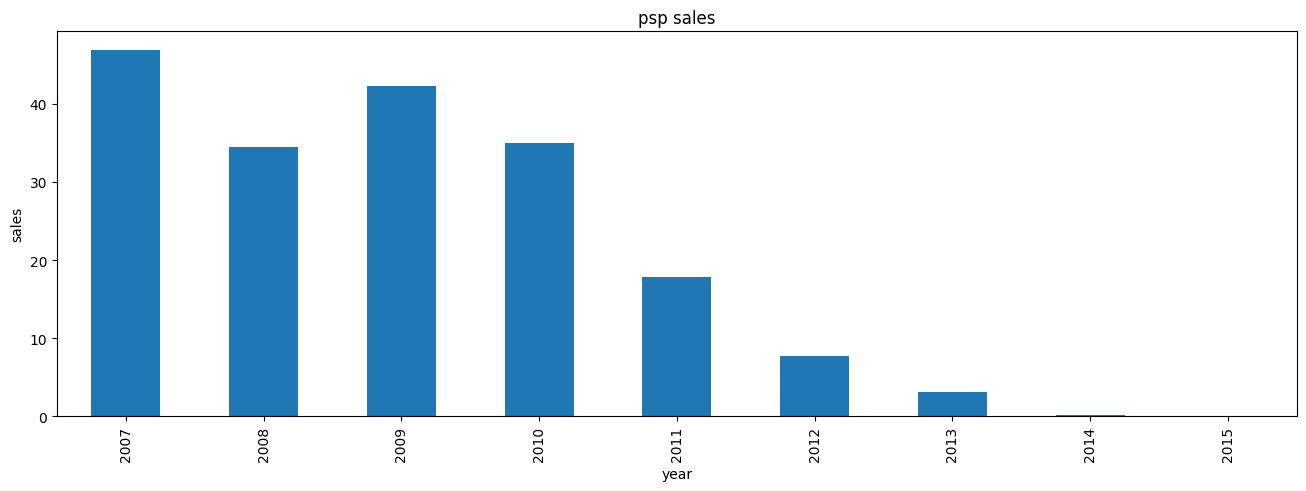

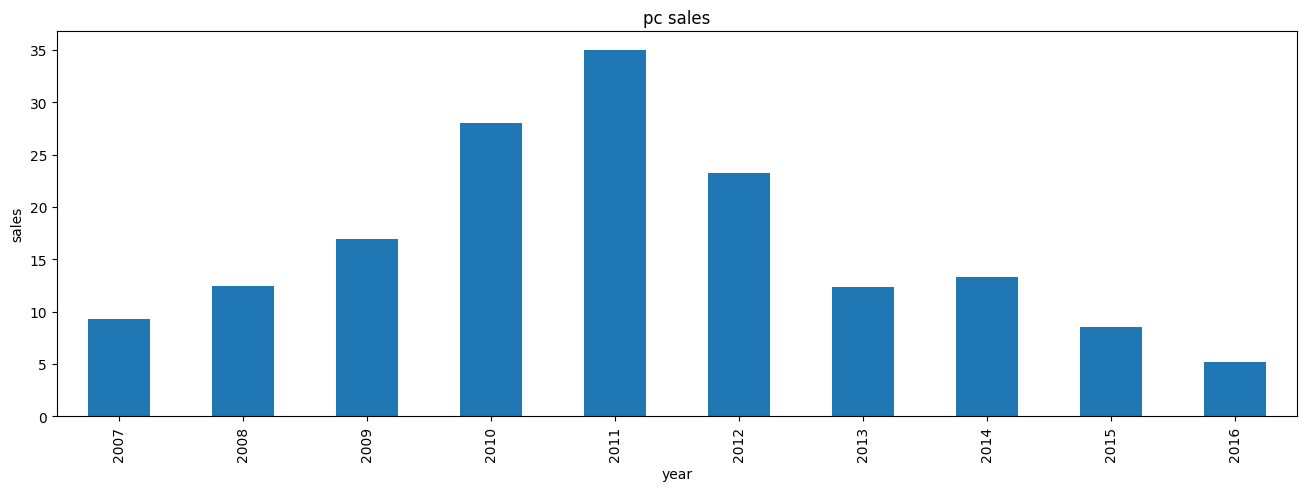

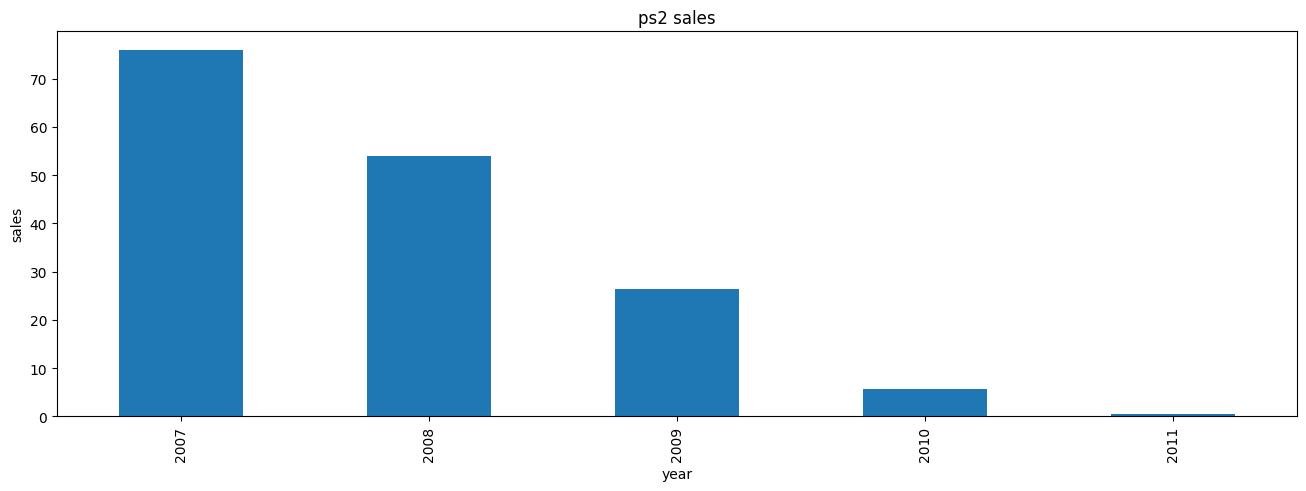

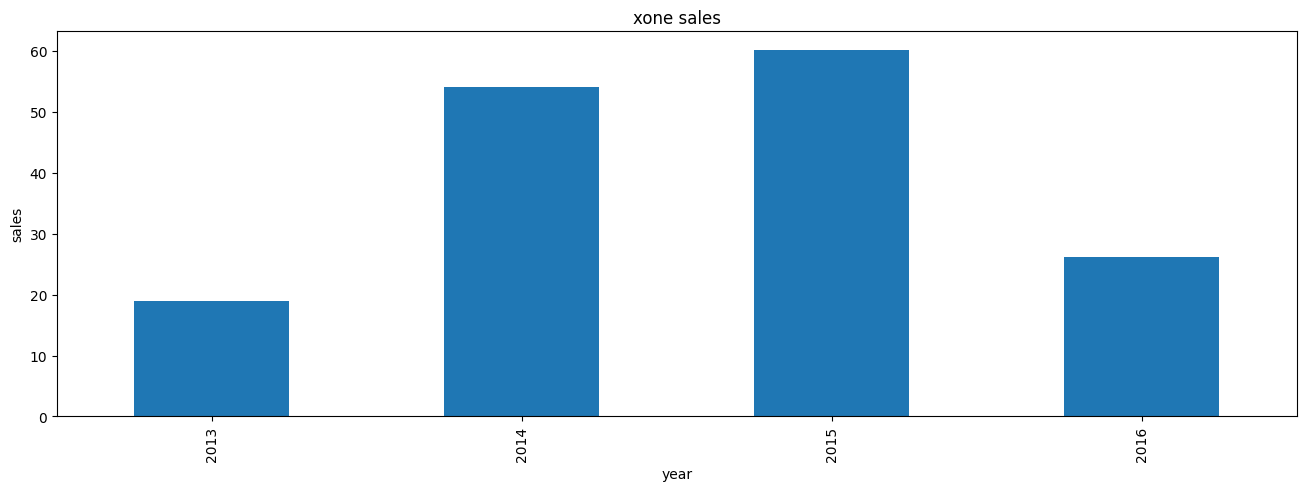

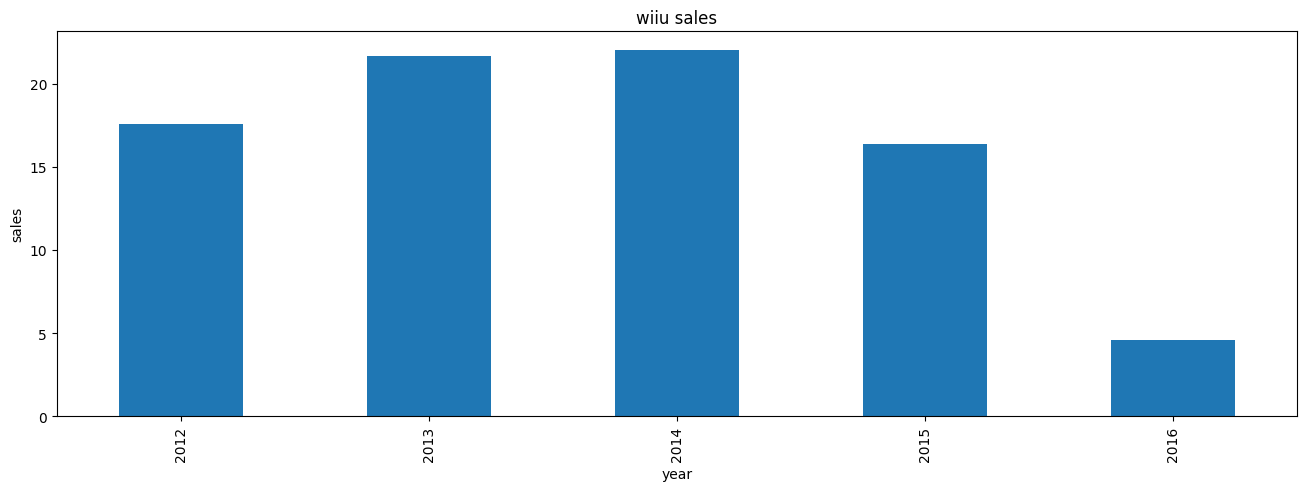

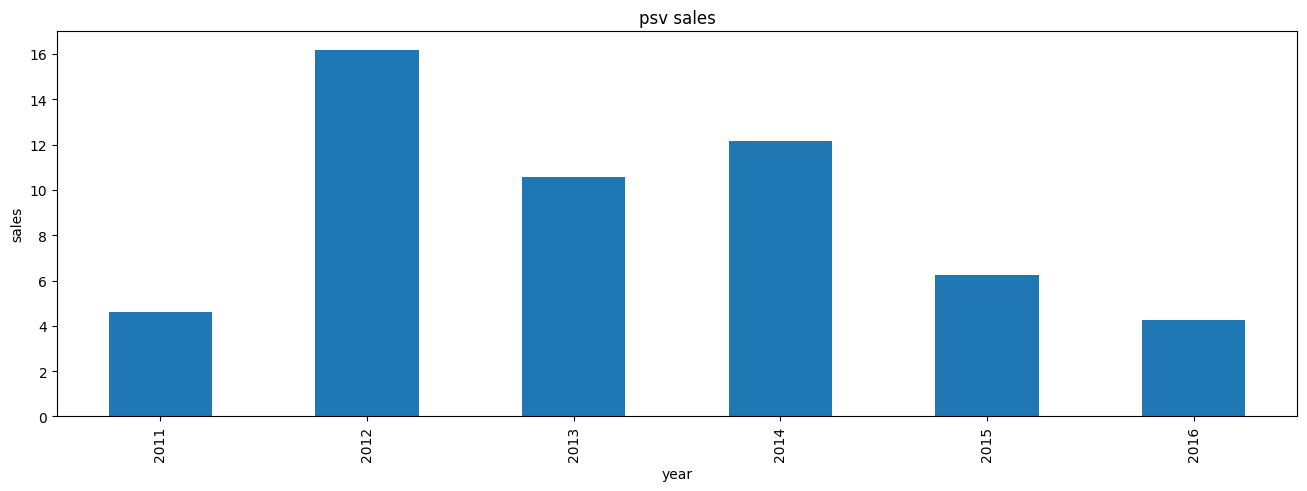

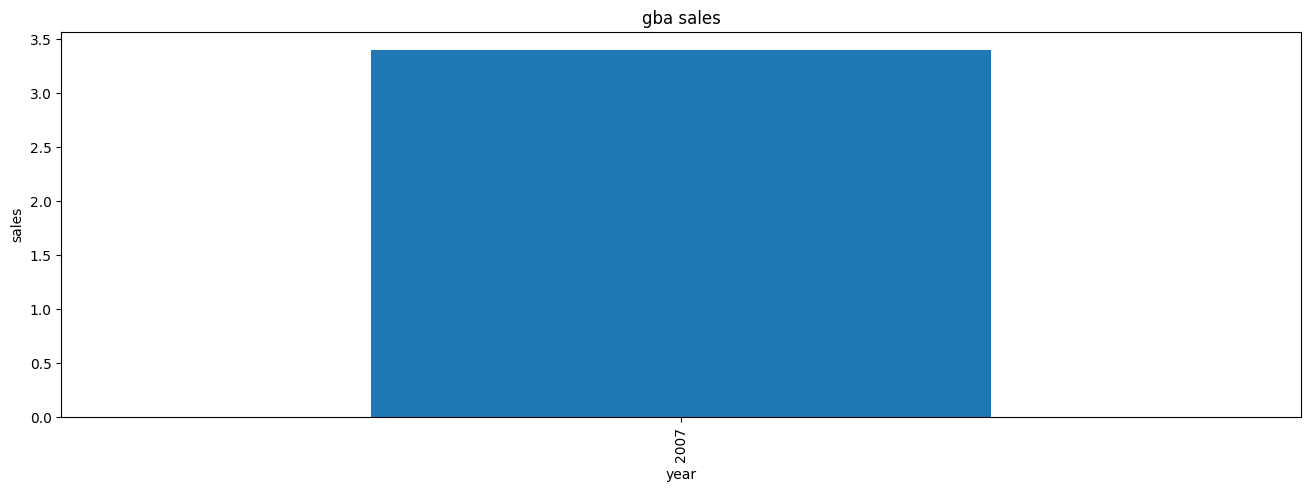

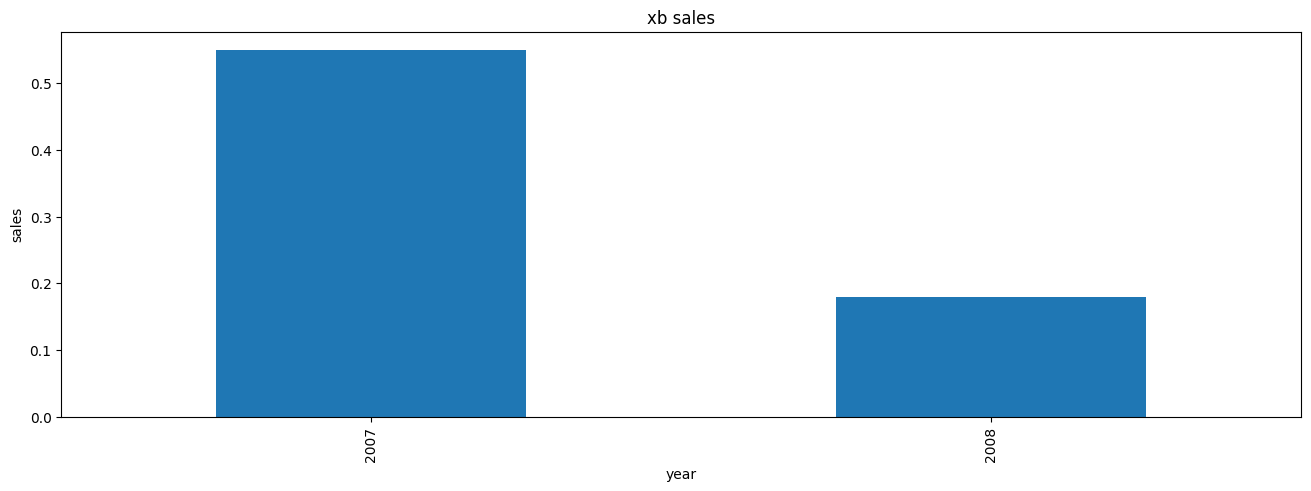

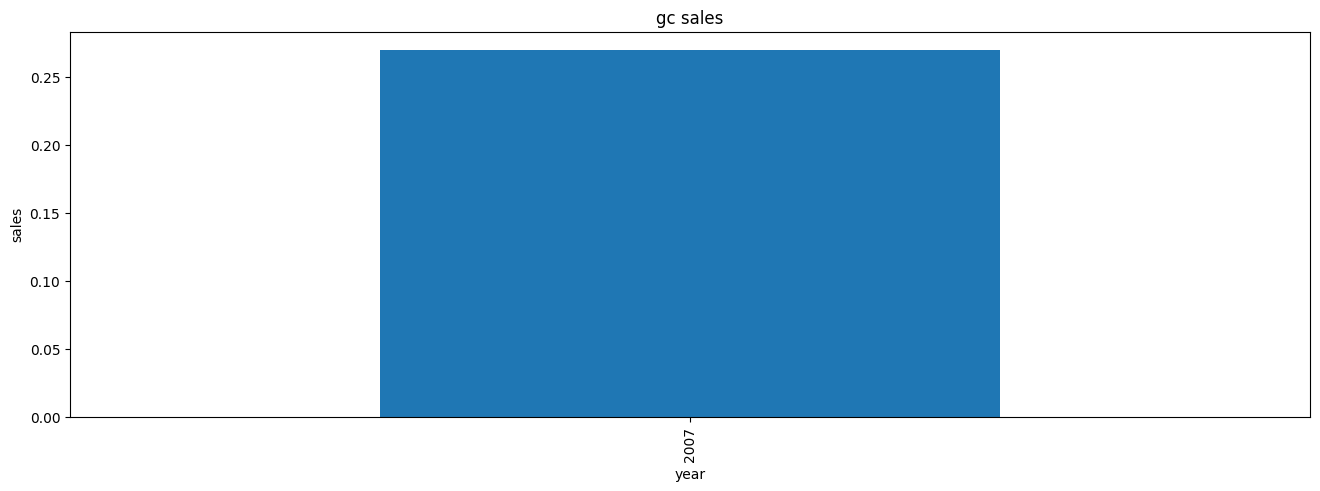

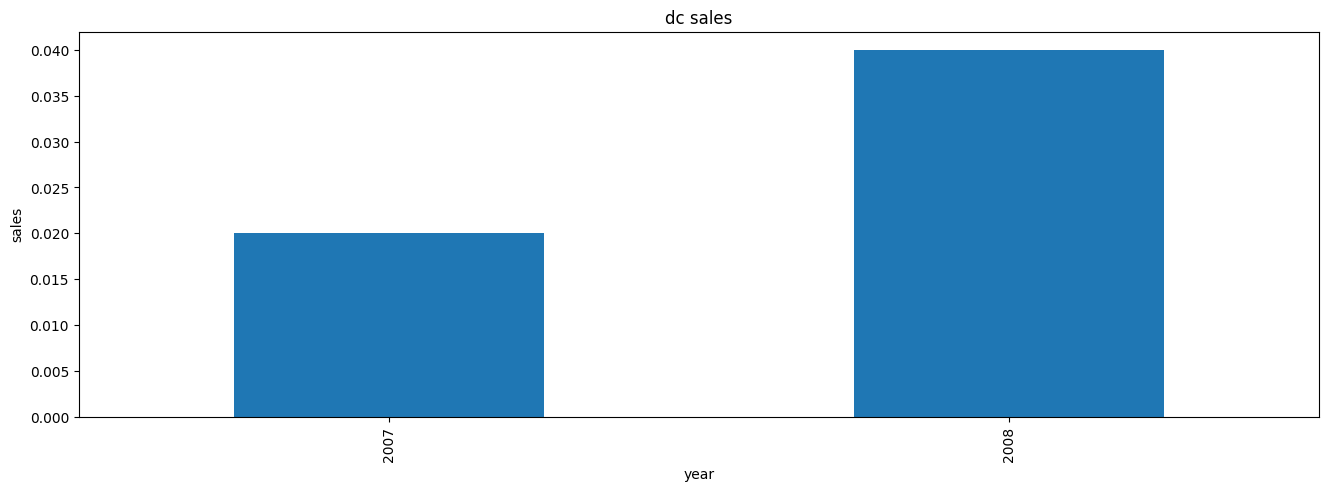

In [42]:
#agrupamos por año de lanzamiento y obtiene la suma de las ventas totales de cada año y trazaremos un gráfico de barras
for platform in significant_platform_ranking.index:
    p_slice=significant_data.query('platform == @platform')
    p_slice.groupby('year_of_release')['total_sales'].sum().plot.bar(figsize=(16, 5))
    plt.title('{} sales'.format(platform))
    plt.xlabel('year')
    plt.ylabel('sales')
    plt.show()
    print('')

- Las plataformas reducidas son ps3, x360, wiiu, pc, 3ds y psv. 
- En crecimiento son ps4 y xone. Sus contenedores no son tan grandes en 2016, probablemente debido al hecho de que el año 2016 aún no había terminado cuando se obtuvieron los datos. 
- Podemos observar que todavía están en las primeras partes de su vida útil por lo que podemos esperar que hacer más beneficios al menos para los próximos 2 o 3 años. Las demás plataformas ya estaban muertas antes de 2016.

### Comparación de las ventas en las plataformas potencialmente rentables
Nuestras plataformas potencialmente rentables son aquellas que aún pueden generar ventas en 2017, a juzgar por lo bien que lo hicieron en 2016, es decir, xone, ps4, pc, 3ds, wiiu y psv. crearemos un slice de con query de nuestro dataframe significant_data que contiene filas donde la plataforma es ps4 o xone. Luego haremos un boxplot de las ventas por plataforma.

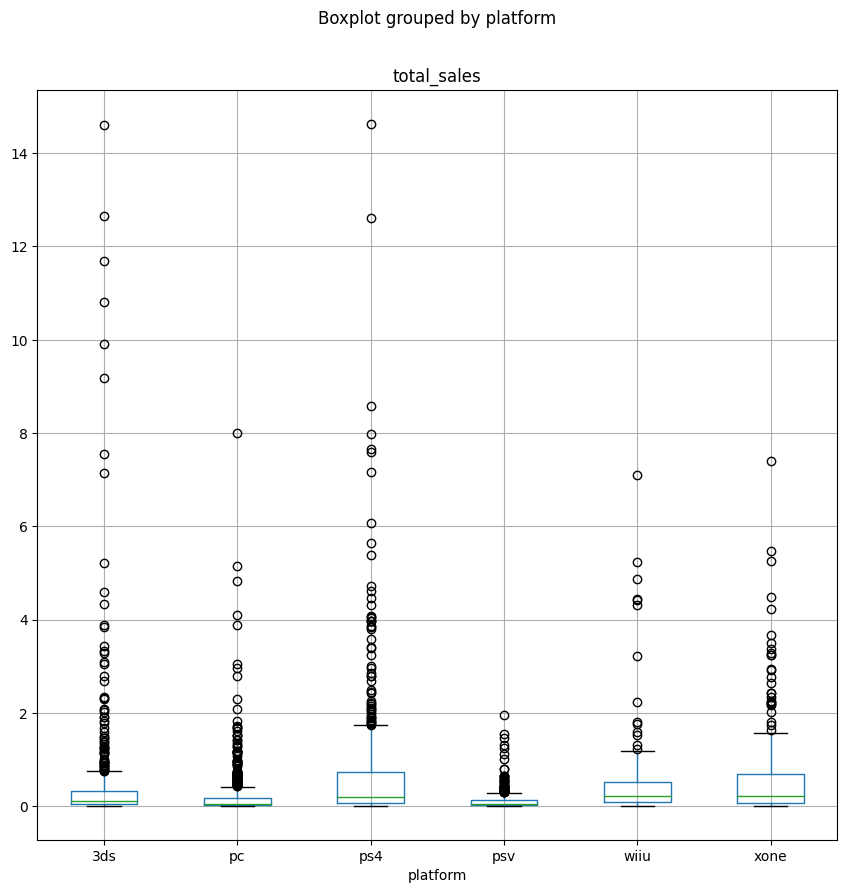

In [43]:
platforms_potentially_profitable=significant_data.query('platform == "ps4" | platform == "xone" | platform == "3ds" | platform == "wiiu" | platform == "pc" | platform == "psv"')
#crearemos un boxplot a partir del slice de ventas por plataforma
platforms_potentially_profitable.boxplot(column='total_sales', by='platform', figsize=(10, 10))
plt.show()

- No hay diferencias notorias entre las medianas y los intervalos de ventas de la ps4, wiiu y xone, mientras que las demás medianas son bajas. 
- la de psv es la más cercana a cero. 
- la ps4 cuenta con más valores atípicos que el xone, con el valor atípico más alto rondando los 14,5 millones de dólares.

### El efecto de las críticas de usuarios y profesionales en las ventas
En primer lugar, construiremos gráficos de dispersión comparando la puntuación de los críticos y la de los usuarios con las ventas_totales. Utilizaremos la plataforma ps4

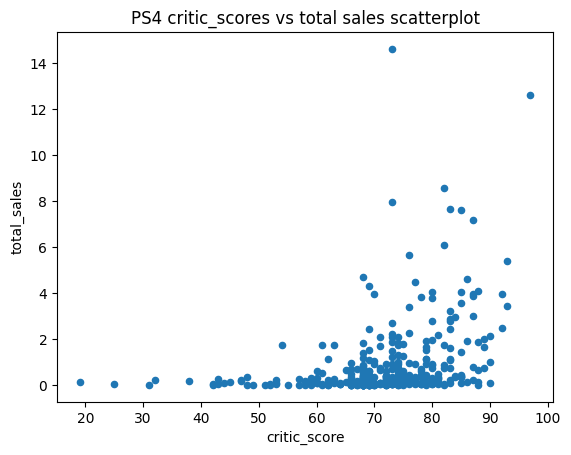

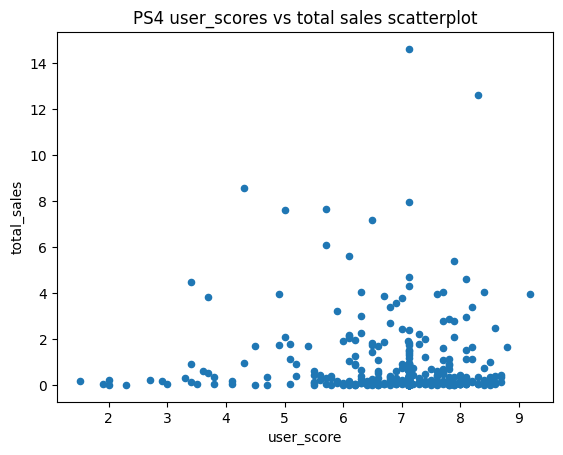

In [44]:
ps4_data = platforms_potentially_profitable.query('platform == "ps4"')
cols=['critic_score', 'user_score']
for column in cols:
    ps4_data.plot(x=column, y='total_sales', kind='scatter')
    plt.title('PS4 {}s vs total sales scatterplot'.format(column))
    plt.show()


Ahora busquemos los coeficientes de correlación. Este coeficiente oscila entre 0 y 1 (para una correlación positiva) y entre -1 y 0 (correlación negativa). Si la correlación es superior a 0,5, implica una fuerte correlación positiva; inferior a -0,5 implica una fuerte correlación negativa. Entre -0,5 y 0,5 implica poca o ninguna correlación o una correlación que no puede expresarse linealmente.

In [45]:
#imprimeremos el coeficiente de correlación "critic_score" vs total_sales 
print(ps4_data['critic_score'].corr(ps4_data['total_sales']))
#imprimiremos el coeficiente de correlación "user_score" vs "total_sales"
print(ps4_data['user_score'].corr(ps4_data['total_sales']))

0.3514080244775847
-0.04539086100332412


Los resultados muestran que tanto user_score como critic_score tienen poca o ninguna correlación lineal con las ventas. Esto significa que la alta calidad no garantiza el éxito comercial de los juegos de ps4.
haremos los mismo con las demás plataformas para ver su comportamiento

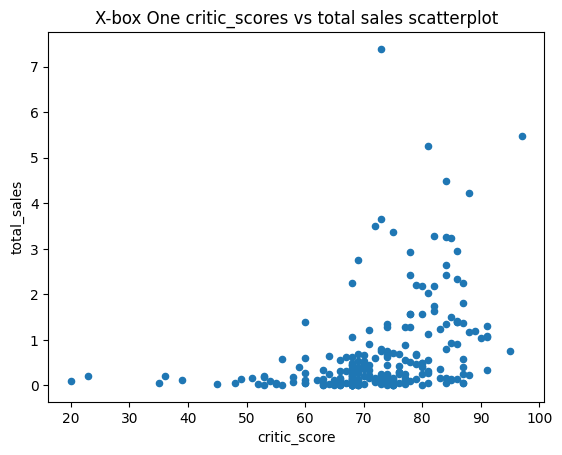

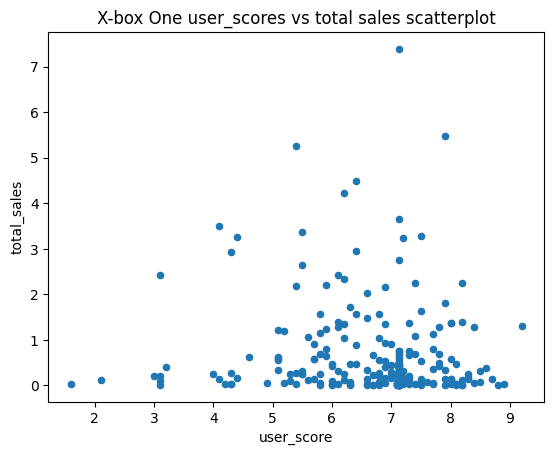

In [46]:
xone_data = platforms_potentially_profitable.query('platform == "xone"')
cols=['critic_score', 'user_score']
for column in cols:
    xone_data.plot(x=column, y='total_sales', kind='scatter')
    plt.title('X-box One {}s vs total sales scatterplot'.format(column))
    plt.show()

coeficiente de corelacion de la xone

In [47]:
print(xone_data['critic_score'].corr(xone_data['total_sales']))
print(xone_data['user_score'].corr(xone_data['total_sales']))

0.3786581617346427
-0.08957370460604369


Las puntuacion crítica y de los usuarios tienen poca o moderada correlación lineal con las ventas totales.

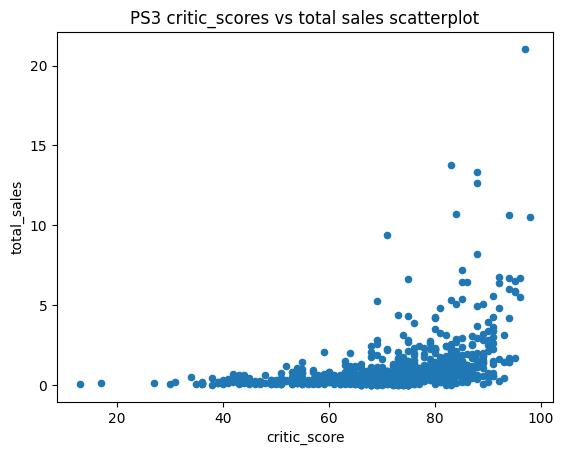

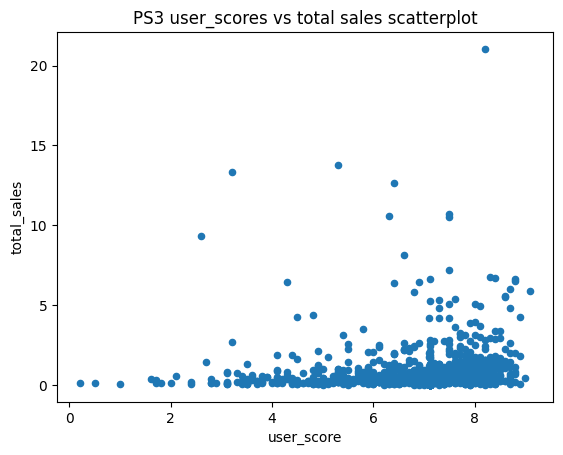

In [48]:
ps3_data=significant_data.query('platform == "ps3"')
cols=['critic_score', 'user_score']
for column in cols:
    ps3_data.plot(x=column, y='total_sales', kind='scatter')
    plt.title('PS3 {}s vs total sales scatterplot'.format(column))
    plt.show()

coeficiente de correlacion de la ps3

In [49]:
print(ps3_data['critic_score'].corr(ps3_data['total_sales']))
print(ps3_data['user_score'].corr(ps3_data['total_sales']))

0.4043688215235061
0.07737406610563416


Sigue sin haber correlación con las ventas totales

### Los géneros más rentables
Veamos en primer lugar cuántos títulos de cada género se han publicado desde 2007

In [50]:
genre_filtered=significant_data['genre'].value_counts().sort_values(ascending=False)
genre_filtered

action          2236
misc            1168
sports          1145
adventure        958
role-playing     896
shooter          683
simulation       564
racing           499
fighting         361
strategy         360
puzzle           328
platform         290
Name: genre, dtype: int64

trazaremos un gráfico de barras un mejor analisis

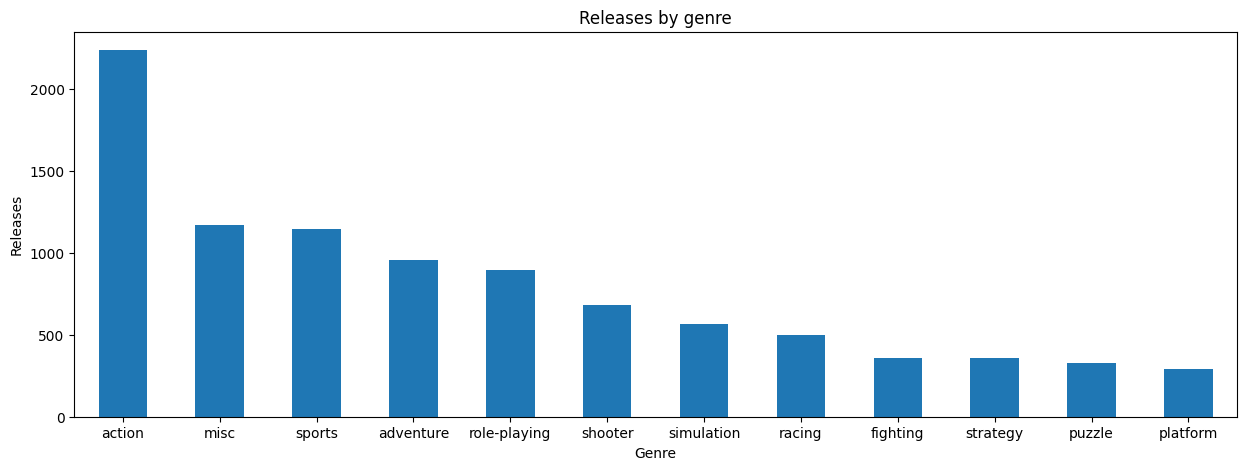

In [51]:
genre_filtered.plot.bar(rot=0, figsize=(15, 5))
plt.title('Releases by genre')
plt.xlabel('Genre')
plt.ylabel('Releases')
plt.show()

Los juegos del genero acción fueron los más vendidos con más de 2.000 titulos vendidos, y los menos, los de plataformas menos de 500 serian fighting, strategy, puzzle, platform.

In [52]:
total_sale_genre = significant_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
total_sale_genre

genre
action          1069.56
shooter          684.68
sports           664.33
misc             496.45
role-playing     466.12
racing           267.26
platform         231.01
simulation       200.75
fighting         166.26
adventure        130.35
puzzle            79.89
strategy          70.54
Name: total_sales, dtype: float64

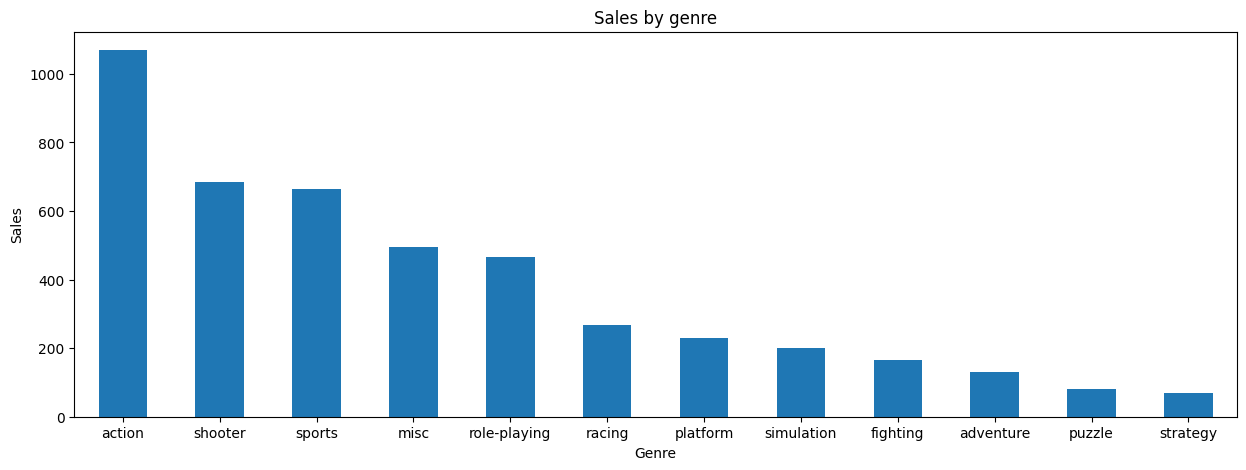

In [53]:
total_sale_genre.plot.bar(rot=0, figsize=(15, 5))
plt.title('Sales by genre')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()

- Los géneros más rentables son los de acción (con diferencia, más de 1.000 millones de dólares), seguido del genero shooter y sport. 
- Los últimos son los de aventuras, puzles y estrategia con pocas ventas. 
- Los géneros que más venden de acción a role-playing requieren en su mayoría gráficos muy elevados, mientras que los que menos venden carreras hasta strategy no requieren en su mayoría tanto trabajo gráfico por parte de los diseñadores.

---

## Paso 4. Perfil de los usuarios de cada región

### Perfil de usuario en  N.A. (Norteamérica)
Encontraremos las plataformas (top 5), géneros (top 5) y clasificaciones de juegos que más se venden en Norteamérica.

platform
x360    560.41
wii     426.04
ps3     384.65
ds      276.07
ps4     108.74
Name: na_sales, dtype: float64


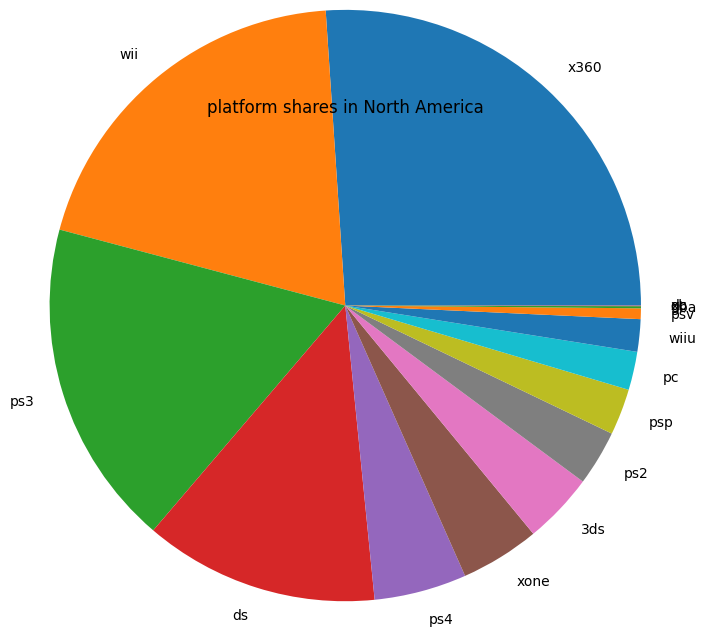


genre
action          501.81
shooter         353.06
sports          327.98
misc            264.51
role-playing    175.79
Name: na_sales, dtype: float64


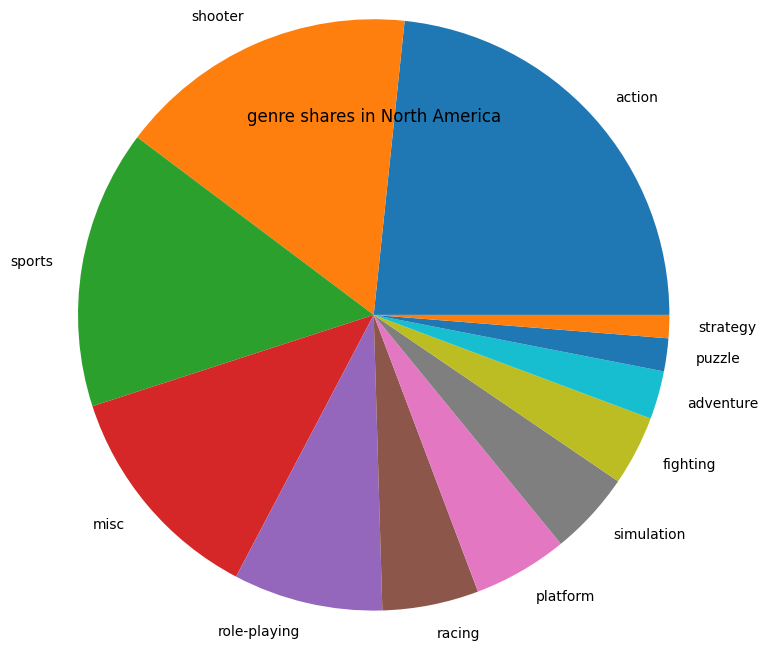


rating
E       780.19
M       578.09
T       495.89
E10+    295.30
EC        1.32
Name: na_sales, dtype: float64


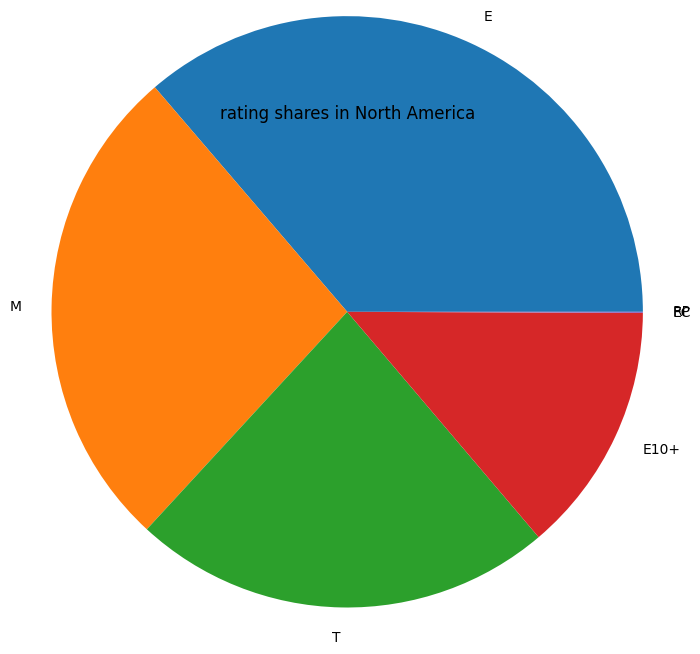

In [54]:
cols=['platform', 'genre', 'rating']
for col in cols:
    na_slice=significant_data.groupby(col)['na_sales'].sum().sort_values(ascending=False)
    print(na_slice.head())
    plt.pie(na_slice, labels=na_slice.index, radius=2)
    plt.title('{} shares in North America'.format(col))
    plt.show()
    print('')

- observando los graficos de pastel podemos ver que enn el mercado norteamericano, las 5 plataformas principales son x360 fabricado en EE.UU., wii, ps3, ds y ps4. Cuatro de ellas son consolas domésticas, y la DS es portátil. 
- Los 5 géneros principales son action, shotter, sports, misc y role-playing. 
- Los juegos clasificados como "E" (Everyone) son los que más se venden, seguidos de los "M" (Mature) y los "T" (Teen).

### El perfil de usuario de EU (EUROPA)
Haremos lo mismo para las ventas en la EU.

platform
ps3     322.91
x360    259.49
wii     218.59
ps4     141.09
ds      120.40
Name: eu_sales, dtype: float64


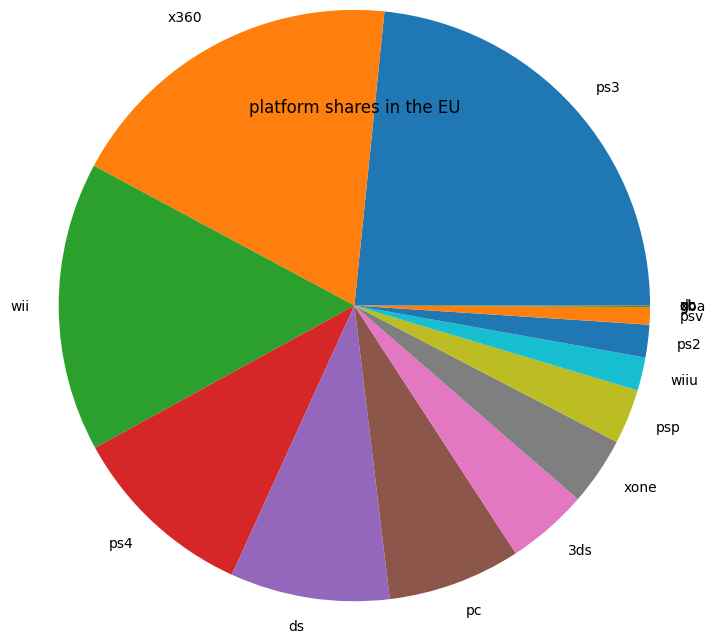


genre
action     341.95
shooter    232.36
sports     212.63
misc       129.02
racing     105.72
Name: eu_sales, dtype: float64


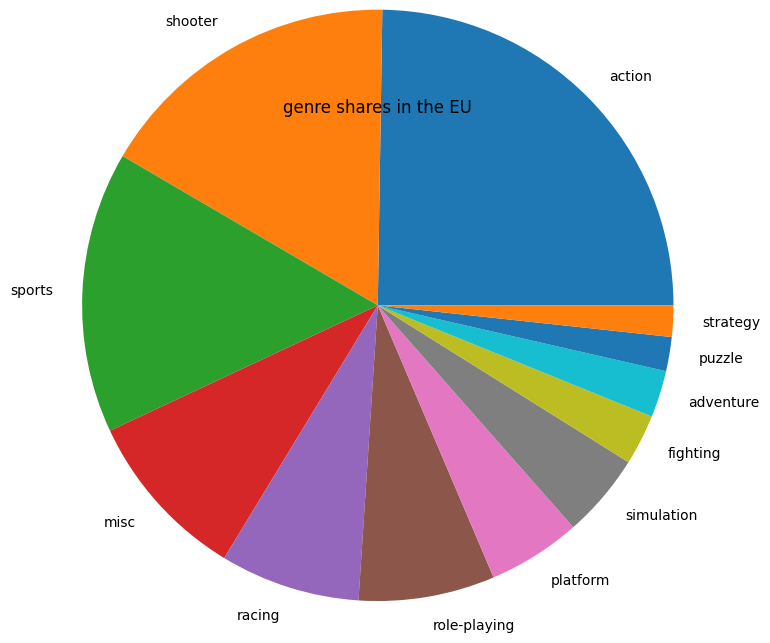


rating
E       506.68
M       410.73
T       296.03
E10+    167.87
RP        0.08
Name: eu_sales, dtype: float64


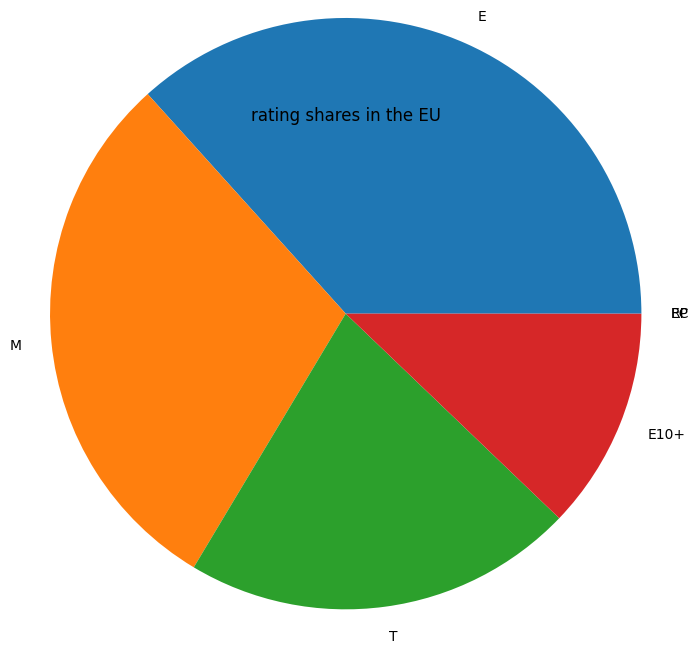

In [55]:
cols=['platform', 'genre', 'rating']
for col in cols:
    eu_slice = significant_data.groupby(col)['eu_sales'].sum().sort_values(ascending=False)
    print(eu_slice.head())
    plt.pie(eu_slice, labels=eu_slice.index, radius=2)
    plt.title('{} shares in the EU'.format(col))
    plt.show()
    print('')

- En el mercado europeo, el top de las 5 plataformas principales son PS3 como lider posterios la X360, Wii, PS4 y DS. 
- Los 5 géneros más vendidos son action, shotter, sports, misc y racing casi los mismos que en el norte de america 
- Los juegos clasificados como E siguen siendo los más vendidos, seguidos de los M y los T.

### Perfil de usuario JP (japonés)
Encontraremos las plataformas (top 5), géneros (top 5) y clasificaciones de juegos que más se venden en japon.

platform
ds     103.48
3ds    100.67
ps3     79.11
psp     67.14
wii     60.18
Name: jp_sales, dtype: float64


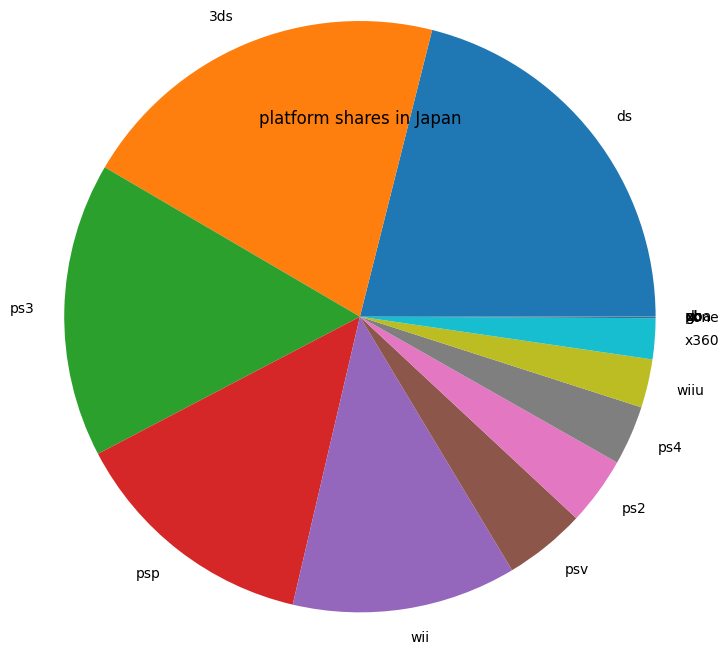


genre
role-playing    151.01
action           97.22
misc             49.88
sports           40.67
adventure        26.93
Name: jp_sales, dtype: float64


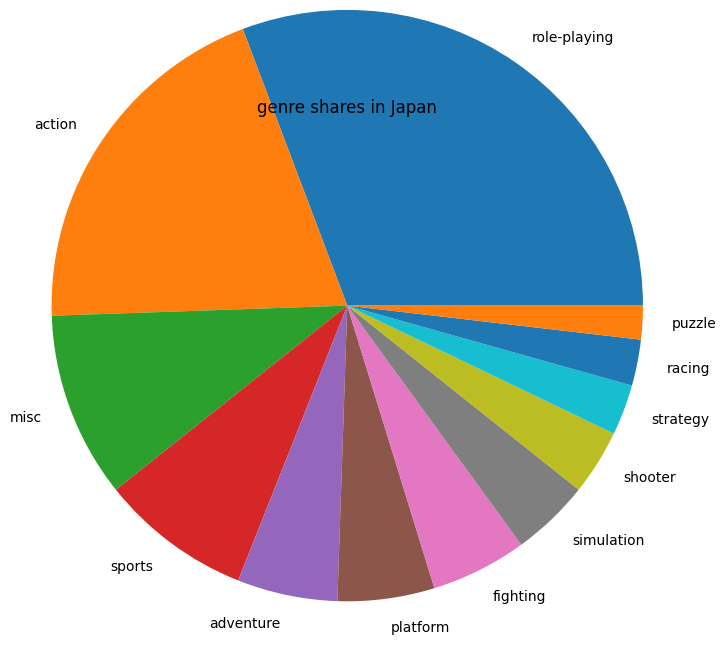


rating
T       230.30
E       185.06
M        43.83
E10+     31.91
EC        0.00
Name: jp_sales, dtype: float64


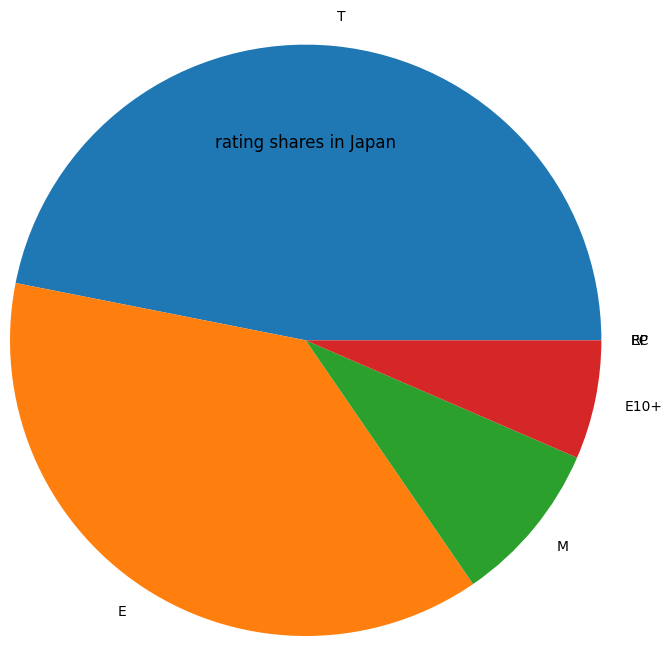

In [56]:
cols=['platform', 'genre', 'rating']
for col in cols:
    jp_slice = significant_data.groupby(col)['jp_sales'].sum().sort_values(ascending=False)
    print(jp_slice.head())
    plt.pie(jp_slice, labels=jp_slice.index, radius=2)
    plt.title('{} shares in Japan'.format(col))
    plt.show()
    print('')

- En el mercado japonés, las 5 plataformas principales son ds, 3ds, ps3, psp y wii. Se observa una preferencia por las plataformas portátiles (ds, 3ds y psp, todas ellas fabricadas en Japón) y al parecer es lo que más se vende. 
- Los géneros más vendidos son el role-playing, action, misc, sports  adventure. 
- Las clasificaciones más vendidas son T, seguida de E y M.

Conclusión intermedia
---
- Hemos analizado las preferencias de los usuarios en las regiones de Norteamérica, Europa y Japón. 
- Las regiones de Norteamérica y Europa tienen una inclinacion preferencial por las consolas domésticas: x360, ps3, wii y ps4 que son estacionarias. mientras que el mercado japonés tiene una inclinacion preferencial por las consolas portátiles: ds, 3ds y psp. 
- El mercados norteamericano y el europeo muestran preferencia por los juegos de action, shooter y sport, en comparacion a el mercado japonés tiende a una inclinacion a preferir los juegos de role-playing, action y sports. 
- En cuanto a las clasificaciones, las 3 primeras al parecer son las mismas en las regiones: Norteamérica y la Europa prefieren los juegos clasificados E, seguidos de M y T, acomparacion al mercado Japónes que tiene una preferencia es T, seguida de E y luego M.
---

## Paso 5. Prueba de hipótesis

### Hipótesis 1: "Las valoraciones promedio de los usuarios de las plataformas Xbox One y PC son las mismas
- Nuestra hipótesis nula será: "Las valoraciones promedio de los usuarios de las plataformas Xbox One y PC son las mismas". 
- Nuestra hipótesis alternativa será: Las valoraciones promedio de los usuarios de las plataformas Xbox One y PC son diferentes'. 
- Crearemos los segmentos necesarios: Un slice para 'plataforma == "xone"', y otro para 'plataforma == "pc"'

In [57]:
#crearemos una segmentacion utilizando el metodo query() de la plataforma "xone"
xone_slice = significant_data.query('platform == "xone"')
xone_slice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             247 non-null    object 
 1   platform         247 non-null    object 
 2   year_of_release  247 non-null    int32  
 3   genre            247 non-null    object 
 4   na_sales         247 non-null    float64
 5   eu_sales         247 non-null    float64
 6   jp_sales         247 non-null    float64
 7   other_sales      247 non-null    float64
 8   critic_score     247 non-null    float64
 9   user_score       247 non-null    float64
 10  rating           247 non-null    object 
 11  total_sales      247 non-null    float64
dtypes: float64(7), int32(1), object(4)
memory usage: 24.1+ KB


In [58]:
#crearemos una segmentacion utilizando el metodo query() de la plataforma "pc"
pc_slice = significant_data.query('platform == "pc"')
pc_slice.info()#general info about our slice

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 85 to 16705
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             741 non-null    object 
 1   platform         741 non-null    object 
 2   year_of_release  741 non-null    int32  
 3   genre            741 non-null    object 
 4   na_sales         741 non-null    float64
 5   eu_sales         741 non-null    float64
 6   jp_sales         741 non-null    float64
 7   other_sales      741 non-null    float64
 8   critic_score     741 non-null    float64
 9   user_score       741 non-null    float64
 10  rating           741 non-null    object 
 11  total_sales      741 non-null    float64
dtypes: float64(7), int32(1), object(4)
memory usage: 72.4+ KB


Antes de afirmar la hipótesis, probaremos si las varianzas pueden considerarse homogéneas. Por ello, utilizaremos el método st.levene() que tomará nuestras columna **"user_score"** de ambos slice como argumentos, y también establecerá el parámetro "center='mean'". Este método devuelve un valor p que compararemos con un umbral llamado significación estadística de 5% (conocido llamado alpha). Si el valor p devuelto es mayor que nuestro alfa, entonces las varianzas pueden considerarse homogéneas de lo contrario si es inferior a alpha, las varianzas no pueden considerarse homogéneas.

In [59]:
alpha = 0.05 
result = st.levene(xone_slice['user_score'], pc_slice['user_score'], center='mean')
print('p-value:', result.pvalue)
if result.pvalue > alpha:
    print('Las desviaciones son aproximadamente las mismas')
else:
    print('Las varianzas están demasiado alejadas para considerarse homogéneas')

p-value: 0.06940698292762643
Las desviaciones son aproximadamente las mismas


- podemos decir que nuestra varianza es homogenea por lo que podemos considerar que las varianzas son iguales para nuestra prueba de hipótesis. 
- Para comprobar nuestra hipótesis, utilizaremos el método st.ttest_ind() que comprueba la probabilidad de que las medias de 2 poblaciones estadísticas sean iguales. 
- También devuelve un valor p que compararemos con el valor alpha. Si el valor p es mayor a alpha, significa que es probable que las medias sean iguales, en cuyo caso no podemos rechazar nuestra hipótesis nula. En caso contrario, podemos rechazar la hipótesis nula.

In [60]:
alpha = 0.05 
result = st.ttest_ind(xone_slice['user_score'], pc_slice['user_score'], equal_var=True)
print('p-value:', result.pvalue)
if result.pvalue > alpha:
    print('No podemos rechazar la hipótesis nula')
else:
    print('Rechazamos la hipótesis nula')

p-value: 0.0955224438332763
No podemos rechazar la hipótesis nula


El valor p es mayor a nuestro valor alpha, lo que significa que es probable que los promedios (medias) de nuestras 2 poblaciones estadísticas sean iguales. Por lo tanto, no podemos rechazar nuestra hipótesis nula.

### Hipótesis 2: "Las valoraciones medias de los usuarios para los géneros Acción y Deportes son diferentes".
- Nuestra hipótesis nula será: 'Las valoraciones promedio de los usuarios de los géneros Action y sports son iguales', 
- Nuestra Hipótesis Alternativa será: Las valoraciones promedio de los usuarios de los géneros Action y sports son diferentes". 
- Crearemos los segmentos necesarios donde 'genre =="action"', y el otro donde 'genre =="sports"'

In [61]:
action_slice = significant_data.query('genre == "action"')
action_slice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 16 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2236 non-null   object 
 1   platform         2236 non-null   object 
 2   year_of_release  2236 non-null   int32  
 3   genre            2236 non-null   object 
 4   na_sales         2236 non-null   float64
 5   eu_sales         2236 non-null   float64
 6   jp_sales         2236 non-null   float64
 7   other_sales      2236 non-null   float64
 8   critic_score     2236 non-null   float64
 9   user_score       2236 non-null   float64
 10  rating           2236 non-null   object 
 11  total_sales      2236 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 218.4+ KB


In [62]:
sports_slice = significant_data.query('genre == "sports"')
sports_slice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1145 entries, 3 to 16700
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1145 non-null   object 
 1   platform         1145 non-null   object 
 2   year_of_release  1145 non-null   int32  
 3   genre            1145 non-null   object 
 4   na_sales         1145 non-null   float64
 5   eu_sales         1145 non-null   float64
 6   jp_sales         1145 non-null   float64
 7   other_sales      1145 non-null   float64
 8   critic_score     1145 non-null   float64
 9   user_score       1145 non-null   float64
 10  rating           1145 non-null   object 
 11  total_sales      1145 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 111.8+ KB


Al igual que antes, para comprobar si las varianzas son homogéneas utilizaremos el metodo

In [63]:
alpha = 0.05 
result = st.levene(action_slice['user_score'], sports_slice['user_score'], center='mean')
print('p-value:', result.pvalue)
if result.pvalue > alpha:
    print('Las desviaciones son aproximadamente las mismas')
else:
    print('Las varianzas están demasiado alejadas para considerarse homogéneas')

p-value: 5.932204906456892e-14
Las varianzas están demasiado alejadas para considerarse homogéneas


- En este caso particular, las varianzas no pueden considerarse homogéneas, ya que el valor p devuelto es inferior a nuestro alfa. Por lo tanto, al aplicar nuestro método st.ttest_ind() para comprobar la igualdad de las medias. 
- Compararemos el valor p devuelto con nuestro alpha. Si el valor p es mayor que nuestro alfa, significa que es probable que las medias sean iguales, en cuyo caso rechazaremos nuestra hipótesis nula. En caso contrario, no podemos rechazar la hipótesis nula.

In [64]:
alpha = 0.05 
result = st.ttest_ind(action_slice['user_score'], sports_slice['user_score'], equal_var=False)
print('p-value:', result.pvalue)
if result.pvalue > alpha:
    print('No podemos rechazar la hipótesis nula')
else:
    print('Rechazamos la hipótesis nula')

p-value: 1.2067195054177038e-09
Rechazamos la hipótesis nula


Podemos observar que el valor p obtenido es inferior a nuestro valor alpha, lo que significa que la diferencia entre las medias de nuestras dos poblaciones estadísticas es estadísticamente significativa. Esto rechaza la hipótesis nula y confirma la hipótesis de que las promedios(medias) son diferentes (hipótesis alternativa).

## Paso 6. Conclusión General

1. Normalizamos las columnas en minúsculas, y cambiamos algunos datos en los tipos convenientes
2. Hemos completado y los tratamos los valores ausentes de la manera mas conveniente posible que faltaban. 
3. Determinamos los géneros, puntuaciones y plataformas más rentables.
4. También vimos que las puntuaciones de críticas y usuarios tenían poca o moderada correlación lineal con las ventas totales. 
5. Creamos perfiles de usuario para los mercados norteamericano, europeo y japonés. 
6. Pusimos a prueba las hipótesis; no pudimos rechazar la hipótesis de que las valoraciones promedio(medias) de los usuarios de las plataformas Xbox One y PC son iguales, y se confirmó la hipótesis de que las valoraciones medias de los usuarios de los géneros Acción y Deportes son diferentes.